In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import load_boston, load_iris, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

import mglearn # 알고리즘을 도식화해서 보여줌

import warnings
warnings.simplefilter('ignore')

import sklearn.metrics as metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.연속데이터

In [ ]:
x = np.array( [1., 2., 3., 4., 5., 6.] ) # 공부시간
y = np.array( [ 5.,  7.,  9., 11., 13., 15.] ) # 점수

In [ ]:
w = 5 # 초기값
b = 5 # 초기값
n = len(x)
epochs = 5000
learning_reate = 0.01

In [ ]:
for i in range( epochs):
    hy = w*x + b # w=2, b=3
    cost = np.sum( (hy-y)**2 )/n
    gradientW = np.sum( (w*x+b-y)*2*x )/n
    gradientB = np.sum( (w*x+b-y)*2 )/n
    w= w- learning_reate*gradientW
    b= b- learning_reate*gradientB
    if i%100==0:
        print(f'epochs:{i}, cost:{cost}, w:{w}, b:{b}')

epochs:0, cost:182.5, w:3.95, b:4.75
epochs:100, cost:0.14058928773518695, w:1.8010749905953443, b:3.8516374518244043
epochs:200, cost:0.06766844882296964, w:1.861991326202766, b:3.590842527212121
epochs:300, cost:0.03257018397256482, w:1.9042533962910269, b:3.409910216154262
epochs:400, cost:0.015676683926684507, w:1.9335736525135212, b:3.284384379202464
epochs:500, cost:0.007545502940486187, w:1.953915235951279, b:3.1972980227063545
epochs:600, cost:0.0036318021649958004, w:1.9680276643562467, b:3.136879915391289
epochs:700, cost:0.0017480593500131144, w:1.9778184771557878, b:3.094963502322638
epochs:800, cost:0.0008413760861260117, w:1.9846110724855839, b:3.065883053387359
epochs:900, cost:0.00040497121467837583, w:1.9893235873971682, b:3.0457078416178716
epochs:1000, cost:0.00019492078206453153, w:1.9925930000021688, b:3.031710837278305
epochs:1100, cost:9.381928863962735e-05, w:1.99486122811015, b:3.022000102505343
epochs:1200, cost:4.51571085833796e-05, w:1.9964348620840227, b:3.

In [ ]:
display(w)
display(b)

1.9999999966893751

3.0000000141734415

# 2.분류

In [ ]:
x = np.array( [1., 2., 3., 4., 5., 6.] ) # hour
y = np.array( [ 0,  0,  0, 1, 1, 1] ) # pass

In [ ]:
# Logistic 개념

import math

def sigmoid( z ):
    return 1/(1+math.e**-z )

In [ ]:
w = 5 # 초기값
b = 5 # 초기값
n = len(x)
epochs = 5000
learning_reate = 0.01

In [ ]:
# for i in range( epochs):
#     hy = w*x + b # w=2, b=3
#     cost = np.sum( (hy-y)**2 )/n
#     gradientW = np.sum( (w*x+b-y)*2*x )/n
#     gradientB = np.sum( (w*x+b-y)*2 )/n
#     w= w- learning_reate*gradientW
#     b= b- learning_reate*gradientB
#     if i%100==0:
#         print(f'epochs:{i}, cost:{cost}, w:{w}, b:{b}')

In [ ]:
def cost( x, y, w):
    n = len(x)
    z = w*x
    hy = sigmoid( z ) #활성함수..
#     cost = np.sum( (hy-y)**2 )/n
    loss_i = y * -np.log(hy) + (1 - y) * -np.log(1 - hy)
    loss = np.sum( loss_i )/ n
    return loss


In [ ]:
x_data = np.array( [1., 2., 3., 4., 5., 6.] )
y_data = np.array( [ 0,  0,  0, 1, 1, 1] )

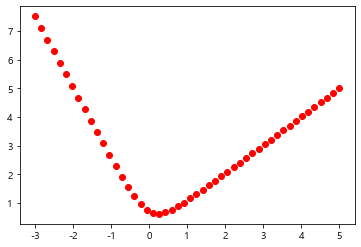

In [ ]:
for w in np.linspace( -3,5,50):
    c = cost( x_data, y_data, w )
    plt.plot( w, c, 'ro')
plt.show()


# 3.로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(b + w x) 
\end{equation}
\begin{equation}
\hat{y} = \sigma(b + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
- 시그모이드 함수 : 연속데이터가 아닌 y값이 0,1로만 구성되어 있는 경우 사용
 - 시그모이드 함수는 0과 1로만 구성되어 있다

* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

- 여기서 BinaryCrossEntropy는 LinearRegreesion에서의 MSE와 같은 개념이다

In [ ]:
#공부한시간, 출석일수
x_data = np.array( [[1,3],[2,2],[3,1],[4,6],[5,5],[6,4],]) # (공부시간, 출석일)
y_data = np.array( [0,0,0,1,1,1])

In [ ]:
model_logi = LogisticRegression()
model_logi.fit(x_data,y_data)

LogisticRegression()

In [ ]:
model_logi.coef_
# 공부시간, 출석일수

array([[0.78341156, 0.78341156]])

In [ ]:
model_logi.intercept_

array([-5.48382067])

In [ ]:
model_logi.predict_proba([[6,6]])
# (0일 확률, 1일 확률)
# 따라서 합격할 확률은 98% 실패할 확률 2%

array([[0.01951014, 0.98048986]])

In [ ]:
model_logi.predict_proba([[6,6]]).argmax(axis=1)

array([1], dtype=int64)

In [ ]:
model_logi.predict([[6,6]])
# 합격

array([1])

In [ ]:
def sigmoid( z ):
    return 1/(1+math.e**-z)

In [ ]:
w=model_logi.coef_.reshape( 2,1)
w

array([[0.78341156],
       [0.78341156]])

In [ ]:
sigmoid( z )

array([[0.98048986]])

In [ ]:
# 예제
# 1시간공부 1시간 출석, 6시간공부하고 5시간 출석한 학생의 합격유무를 예측하시요.

In [ ]:
model_logi.predict([[1, 1], [6, 5]])

array([0, 1])

In [ ]:
model_logi.predict_proba([[1, 1], [6, 5]])

array([[0.98048756, 0.01951244],
       [0.04173811, 0.95826189]])

In [ ]:
model_logi.predict_proba([[1,1],[6,5]]).argmax(axis=1)

array([0, 1], dtype=int64)

In [ ]:
z = np.matmul( [[1, 1], [6, 5]], w ) + model_logi.intercept_
z

array([[-3.91699754],
       [ 3.13370653]])

In [ ]:
sigmoid( z )

array([[0.01951244],
       [0.95826189]])

## 3-1.Logistic 파라미터

> penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

> l1: 맨하튼 거리, 
오차 = 오차 + alpha * (|w1| + |w2|) <br>
> l2: 유클리디안 거리의 제곱, 오차 = 오차 + alpha * (W1^2 + w2^2)

> 가중치 규제 (특성 수 줄이기, 과대적합 방지) <br> none이면 가중치 규제 미사용 <br>

> loss = loss + regularization strength X 가중치의 l1 혹은 l2 거리 (가중치 규제(과적합 방지))<br>
  가중치가 커지지 못하게 하기 (과적합 방지)<br>

> C : float, optional (default=1.0)<br>
  alpha 의 역수<br>
  alpha 는 클수록 가중치 규제, 작을수록 정확하게 (과적합)<br>

> regularization strength(가중치 규제 항목에 곱해지는 값)의 역수 (과적합 방지) <br>
  디폴트 1.0 <br>
  역수기 때문에 작을수록 과적합 방지


> penalty:L1 혹은 L2 제약조건의 강도를 설정  

> alpha: 높은 알파 값을 설정할 수록, 높은 제약조건을 설정하는 것

> C: 
cost function의 C를 의미하는 것이며,
C의 경우에는 높은 C를 설정할 수록, 낮은 강도의 제약조건이 설정되고
낮은 C를 설정할 수록, 높은 강도의 제약조건이 설정

> solver : 
liblinear:L1제약조건, L2제약조건 두 가지를 모두 지원하며, 이것은 작은 데이터에 적합한 알고리즘. <br>
sag, saga: 이것을 확률적경사하강법을 기반으로 하기에 대용량 데이터에 적합한 알고이름이라고 하며, <br>
sag는 L1 제약조건만을 지원하고, saga는 L1, L2 제약조건 둘 다 지원함.

> 회귀알고리즘에서 ridge와 lasso와 계수를 다루는 방법이 유사하다고 보면 된다.
L1규제는 lasso처럼 계수를 0으로도 만들 수 있고,
L2규제는 ridge처럼 계수를 0으로 만들진 않지만 영향력이 작으면 0에 가까운 값을 만들어 회귀식을 구성하게 된다.
</div>

> newton-cg, lbfgs (sag, saga)  이것은 멀티클래스의 분류 모델에 쓰는 것 <br>
현재까지는 이 중에서 lbfgs 알고리즘이 가장 성능이 좋다고 알려져 있고, newton-cg, lbfgs 도 L2제약조건만 지원함.<br>
결국 sag는 L1만 지원하고, newton-cg, saga, lbfgs 세 가지가 L2만 지원하고, <br>
liblinear, saga가 L1, L2 둘 다 지원<br>

> penalty :  L1, L2 제약조건을 설정하는 하이퍼 파라미터이고, default는 L2
    
> class_weight :데이터에 직접 가중치를 설정하여 학습의 강도를 다르게 할 수 있는 하이퍼 파라미터.


# 4.피마인디안 연습문제

정보 1 : 과거 임신 횟수 (pregnant)

정보 2 : 포도당 부하 검사 2시간 후 공복 혈당 농도 (plasma)

정보 3 : 확장기 혈압 (pressure)

정보 4 : 삼두근 피부 주름 두께 (thickness)

정보 5 : 혈정 인슐린 (insulin)

정보 6 : 체질량 지수 (BMI)

정보 7 : 당뇨병 가족력 (pedigree)

정보 8 : 나이 (age)

​

클래스 : 당뇨( 1) , 당뇨가 아님 ( 0 )


> 학습셋과 테스트셋의  정확를 구하시오<br>
test셋의 0번째 row 데이터로 당뇨병 유무 확인


In [ ]:
df = pd.read_csv('datas/pima-indians-diabetes.data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

#분류에서는 반드시 stratify 옵션을 줘야한다.
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, 
                                                 test_size=0.2, random_state=1, stratify=y_data)

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train,y_train)

print('train : ',model.score(x_train,y_train))
print('test : ',model.score(x_test,y_test))
print('predict : ',model.predict(x_test.iloc[[0],:]))

train :  0.7866449511400652
test :  0.7857142857142857
predict :  [0]


In [ ]:
p = model.predict(x_test)
p 

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [ ]:
(p == y_test.values).mean()

0.7857142857142857

In [ ]:
y_test.iloc[0]

1